In [2]:
import os
import numpy as np
print(os.getcwd())

D:\Proyectos_Python\Mineria\0.Códigos


In [6]:
Data=np.load('D:/Proyectos_Python/Mineria/1.Datos/images.npy')

In [17]:
Types=np.load('D:/Proyectos_Python/Mineria/1.Datos/types.npy')

In [117]:
Mask=np.load('D:/Proyectos_Python/Mineria/1.Datos/masks.npy')

In [7]:
type(Data)

numpy.ndarray

In [8]:
#print(Data)

[[[[212. 191. 201.]
   [212. 191. 201.]
   [217. 194. 205.]
   ...
   [182. 135. 171.]
   [185. 138. 175.]
   [187. 141. 177.]]

  [[212. 191. 201.]
   [212. 191. 201.]
   [217. 194. 205.]
   ...
   [182. 135. 171.]
   [185. 138. 175.]
   [187. 141. 177.]]

  [[218. 197. 207.]
   [218. 197. 207.]
   [221. 198. 209.]
   ...
   [184. 139. 175.]
   [188. 142. 178.]
   [190. 144. 180.]]

  ...

  [[170. 128. 165.]
   [170. 128. 165.]
   [177. 135. 172.]
   ...
   [193. 130. 168.]
   [188. 126. 165.]
   [185. 125. 163.]]

  [[173. 131. 167.]
   [173. 131. 167.]
   [182. 140. 176.]
   ...
   [191. 128. 165.]
   [188. 127. 164.]
   [185. 126. 162.]]

  [[169. 127. 162.]
   [169. 127. 162.]
   [177. 135. 171.]
   ...
   [188. 127. 162.]
   [188. 128. 163.]
   [186. 127. 162.]]]


 [[[189. 142. 179.]
   [190. 144. 181.]
   [190. 145. 182.]
   ...
   [202. 161. 187.]
   [209. 170. 195.]
   [215. 178. 203.]]

  [[189. 142. 179.]
   [190. 144. 181.]
   [190. 145. 182.]
   ...
   [202. 161. 187.]
 

In [10]:
Data.ndim
Data.shape

(2656, 256, 256, 3)

In [16]:
#Data[:,1,1,1].shape

(2656,)

In [18]:
#Types.shape

(2656,)

In [19]:
print(Types)

['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']


In [112]:
#Data[0,:,:,0]

In [113]:
#Data[0,:,:,1]

In [114]:
#print(Data[0,:,:,0])
#print(Data[0,:,:,1])
#print(Data[0,:,:,2])
#print(Data[0,:,:,:])
#data1=Data[0,:,:,:]
#data1.shape


In [115]:
#mylist=[]
#for row in data1:
#    for a in row:
#        aux=(a[0],a[1],a[2])
#        mylist.append(aux)
#print(mylist)        

In [116]:
prueba1=Data[0,:,:,:]
#print(prueba1)
prueba2=np.array(prueba1, dtype=np.uint8)
#print(prueba2)

In [27]:
from PIL import Image as im

In [127]:
#img1 = im.fromarray(Data[0,:,:,:])
img2 = im.fromarray(prueba2,"RGB")   

In [189]:
img2.show()

In [111]:
#display(img1)
#img1.save('img1.tif')
img2.save('img2.png')

In [47]:
img2 = im.open('img1.tif')

In [118]:
Mask.shape

(2722, 256, 256, 6)

In [120]:
f0=Mask[0,:,:,0]

In [121]:
f2=np.array(f0, dtype=np.uint8)
f2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [124]:
#imgf2 = im.fromarray(f2)  
#imgf2.show()

In [125]:
#img2.paste(imgf2)

In [126]:
#img2.show()

In [133]:
prueba3=prueba2

In [147]:
prueba3[:,:,0]=prueba2[:,:,0]+f2*(-300)
prueba3[:,:,1]=prueba2[:,:,1]+f2*(-300)
prueba3[:,:,2]=prueba2[:,:,2]+f2*(-300)

In [144]:
#img3 = im.fromarray(prueba3,"RGB")   

In [145]:
#img3.show()

In [185]:
i=0
new_image =prueba3 
for item in prueba3:
    #print(item)
    j=0
    new_image[i]=item
    
    for a in item:     
    # change all white (also shades of whites)
    # pixels to yellow
        if a[0] <0:
            new_image[i][j]=[255, 224, 100]
        else:
            j=j+1
    i=i+1
 

    

In [186]:
img3 = im.fromarray(new_image,"RGB") 
#img3.putdata(new_image)
#new_image
#prueba3[0][0][0]
#prueba3

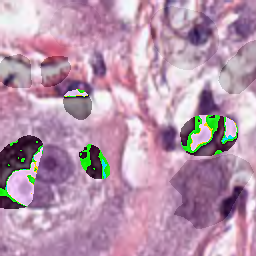

In [187]:
img3

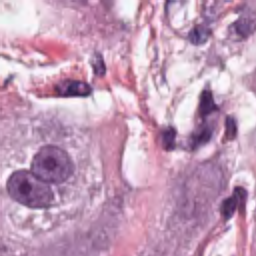

In [188]:
img2

In [190]:
type(Data)

numpy.ndarray

In [195]:
MeanData=Data.mean(axis=0)
MeanData.shape

(256, 256, 3)

In [236]:


mean_img = im.fromarray(np.array(MeanData, dtype=np.uint8),"RGB")   

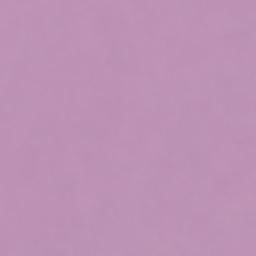

In [237]:
mean_img

In [224]:
print(Data.shape)
print(Types.shape)

Types

#VTipos únicos de Cáncer
CU=np.unique(Types)

#Creamos arreglos con el índice correspondiente a cada tipo de cáncer
Adrenal_gland = [index for index in range(len(Types))if Types[index] == CU[0]]
Bile_duct = [index for index in range(len(Types))if Types[index] == CU[1]]
Bladder = [index for index in range(len(Types))if Types[index] == CU[2]]
Breast = [index for index in range(len(Types))if Types[index] == CU[18]]
Cervix = [index for index in range(len(Types))if Types[index] == CU[3]]
Colon = [index for index in range(len(Types))if Types[index] == CU[4]]
Esophagus = [index for index in range(len(Types))if Types[index] == CU[5]]
HeadNeck = [index for index in range(len(Types))if Types[index] == CU[6]]
Kidney = [index for index in range(len(Types))if Types[index] == CU[7]]
Liver = [index for index in range(len(Types))if Types[index] == CU[8]]
Lung = [index for index in range(len(Types))if Types[index] == CU[9]]
Ovarian = [index for index in range(len(Types))if Types[index] == CU[10]]
Pancreatic = [index for index in range(len(Types))if Types[index] == CU[11]]
Prostate = [index for index in range(len(Types))if Types[index] == CU[12]]
Skin = [index for index in range(len(Types))if Types[index] == CU[13]]
Stomach = [index for index in range(len(Types))if Types[index] == CU[14]]
Testis = [index for index in range(len(Types))if Types[index] == CU[15]]
Thyroid = [index for index in range(len(Types))if Types[index] == CU[16]]
Uterus = [index for index in range(len(Types))if Types[index] == CU[17]]

#print(indexes)

(2656, 256, 256, 3)
(2656,)


In [226]:
#Segmentamos la Base por tipo de cáncer
DAdrenal_gland=Data[Adrenal_gland]
DBile_duct=Data[Bile_duct]
DBladder=Data[Bladder]
DBreast=Data[Breast]
DCervix=Data[Cervix]
DColon=Data[Colon]
DEsophagus=Data[Esophagus]
DHeadNeck=Data[HeadNeck]
DKidney=Data[Kidney]
DLiver=Data[Liver]
DLung=Data[Lung]
DOvarian=Data[Ovarian]
DPancreatic=Data[Pancreatic]
DProstate=Data[Prostate]
DSkin=Data[Skin]
DStomach=Data[Stomach]
DTestis=Data[Testis]
DThyroid=Data[Thyroid]
DUterus=Data[Uterus]

In [229]:
listdata=[
    DAdrenal_gland,
DBile_duct,
DBladder,
DBreast,
DCervix,
DColon,
DEsophagus,
DHeadNeck,
DKidney,
DLiver,
DLung,
DOvarian,
DPancreatic,
DProstate,
DSkin,
DStomach,
DTestis,
DThyroid,
DUterus
]

i=0
for data in listdata:
    print("Base: ",CU[i]," ",data.shape)
    i=i+1

Base:  Adrenal_gland   (134, 256, 256, 3)
Base:  Bile-duct   (159, 256, 256, 3)
Base:  Bladder   (21, 256, 256, 3)
Base:  Breast   (17, 256, 256, 3)
Base:  Cervix   (827, 256, 256, 3)
Base:  Colon   (155, 256, 256, 3)
Base:  Esophagus   (478, 256, 256, 3)
Base:  HeadNeck   (155, 256, 256, 3)
Base:  Kidney   (70, 256, 256, 3)
Base:  Liver   (37, 256, 256, 3)
Base:  Lung   (65, 256, 256, 3)
Base:  Ovarian   (80, 256, 256, 3)
Base:  Pancreatic   (54, 256, 256, 3)
Base:  Prostate   (78, 256, 256, 3)
Base:  Skin   (77, 256, 256, 3)
Base:  Stomach   (59, 256, 256, 3)
Base:  Testis   (50, 256, 256, 3)
Base:  Thyroid   (60, 256, 256, 3)
Base:  Uterus   (80, 256, 256, 3)


In [242]:
imglist=[]
for data in listdata:
    imglist.append(im.fromarray(np.array(data.mean(axis=0), dtype=np.uint8),"RGB"))

In [244]:
i=0
for img in imglist:
    img.save(CU[i]+'.png')
    i=i+1

#img2.save('img2.png')
#for img in imglist:
#    img.show()